# Interpolation With Image Inpainting in OpenCV

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import copy

In [145]:
import scipy.misc
scipy.misc.imsave('ooccupancy_image.jpg', img)

/home/greg/standard_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


##### Load test image, hide values and create interpolation mask

In [226]:
img = cv2.imread('ooccupancy_image.jpg')     # input
print("Image shape: {}".format(np.shape(img)))

height, width, _ = np.shape(img)

mask = np.random.binomial(1, 0.99, (height, width, 1)).astype(np.bool)
mask3d = np.concatenate([mask, mask, mask], axis=2)

corrupted_img = copy.deepcopy(img)
corrupted_img[mask3d] = 255

mask = mask.astype(np.uint8).reshape(height, width)*255

Image shape: (300, 300, 3)


##### Perform inpainting

In [227]:
total = np.prod(np.shape(corrupted_img))
num_missing = total - np.sum(corrupted_img == 255)
percent = num_missing/total * 100

print("Reconstructing original image with {} points using {} points - ie {:.3f}% of total points".format(total, num_missing, percent))

mean_interpolation = copy.deepcopy(corrupted_img)
mean_interpolation[mask3d] = np.mean(corrupted_img[~mask3d])

dst_TELEA = cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)
dst_NS = cv2.inpaint(img,mask,3,cv2.INPAINT_NS)

Reconstructing original image with 270000 points using 19974 points - ie 7.398% of total points


error: OpenCV(4.4.0) /tmp/pip-req-build-kne9u3r2/opencv/modules/photo/src/inpaint.cpp:759: error: (-210:Unsupported format or combination of formats) The mask must be 8-bit 1-channel image in function 'icvInpaint'


##### Visualise inpainting results

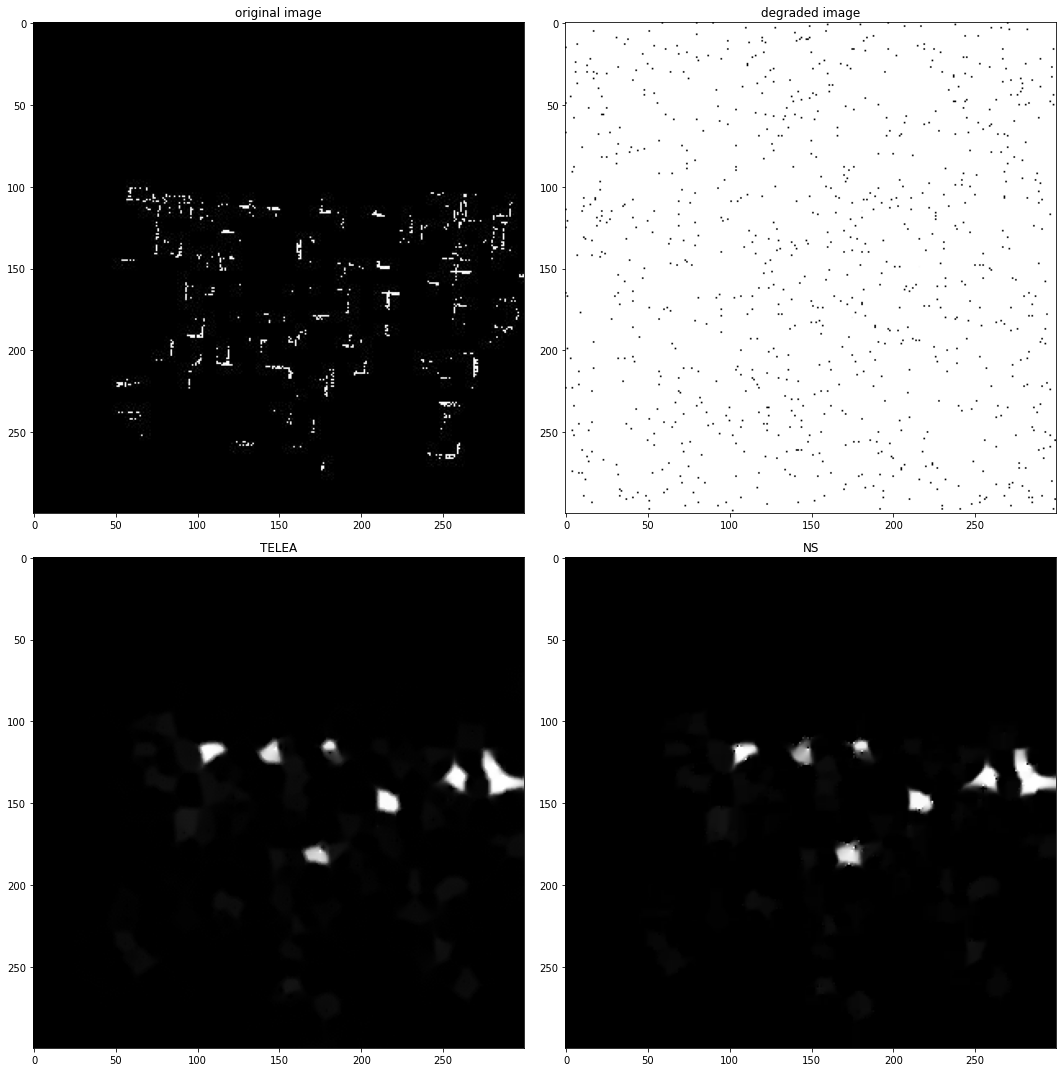

In [223]:
plt.figure(figsize=(15,15))

plt.subplot(222), plt.imshow(corrupted_img)
plt.title('degraded image')
plt.subplot(221), plt.imshow(img)
plt.title('original image')
plt.subplot(223), plt.imshow(dst_TELEA)
plt.title('TELEA')
plt.subplot(224), plt.imshow(dst_NS)
plt.title('NS')

plt.tight_layout()
plt.show()

##### Evaluation metrics

In [220]:
scaled_rmse_mean = np.sqrt(np.mean(np.square(mean_interpolation/255 - img/255)))
scaled_rmse_telea = np.sqrt(np.mean(np.square(dst_TELEA/255 - img/255)))
scaled_rmse_ns = np.sqrt(np.mean(np.square(dst_NS/255 - img/255)))

print("Scaled RMSE of mean interpolation: {:.3f}".format(scaled_rmse_mean))
print("Scaled RMSE of Telea inpainting: {:.3f}".format(scaled_rmse_telea))
print("Scaled RMSE of NS inpainting: {:.3f}".format(scaled_rmse_ns))

Scaled RMSE of mean interpolation: 0.136
Scaled RMSE of Telea inpainting: 0.032
Scaled RMSE of NS inpainting: 0.030
